In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

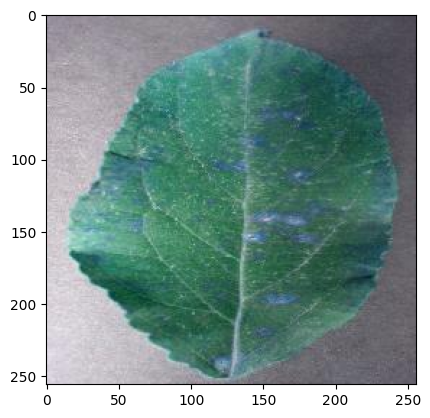

In [2]:
img = cv2.imread('./image.jpg')
plt.imshow(img)
plt.show()

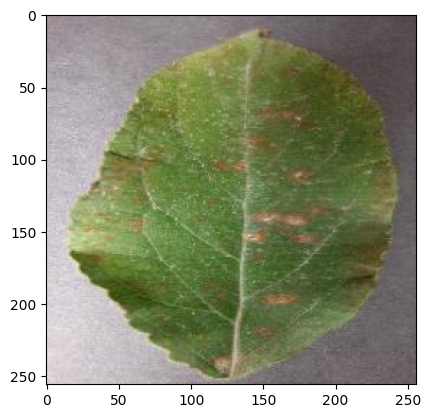

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

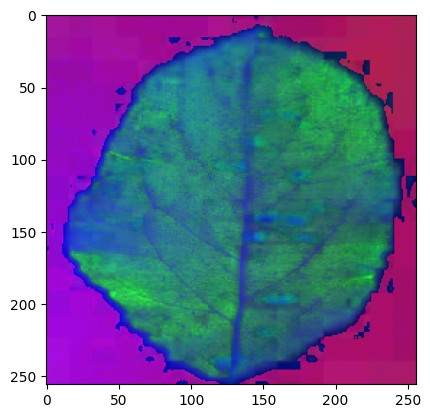

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

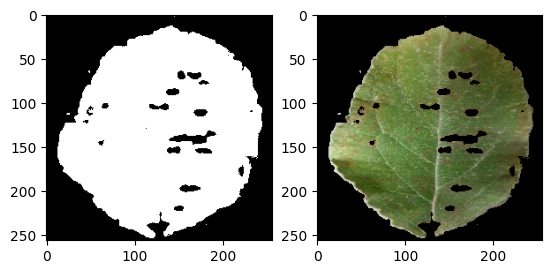

In [5]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

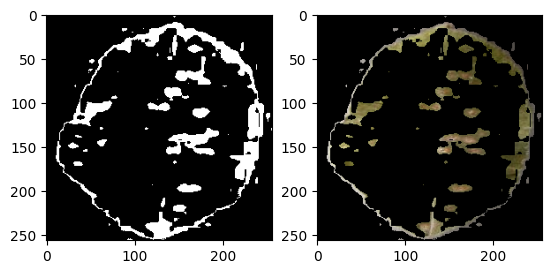

In [6]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

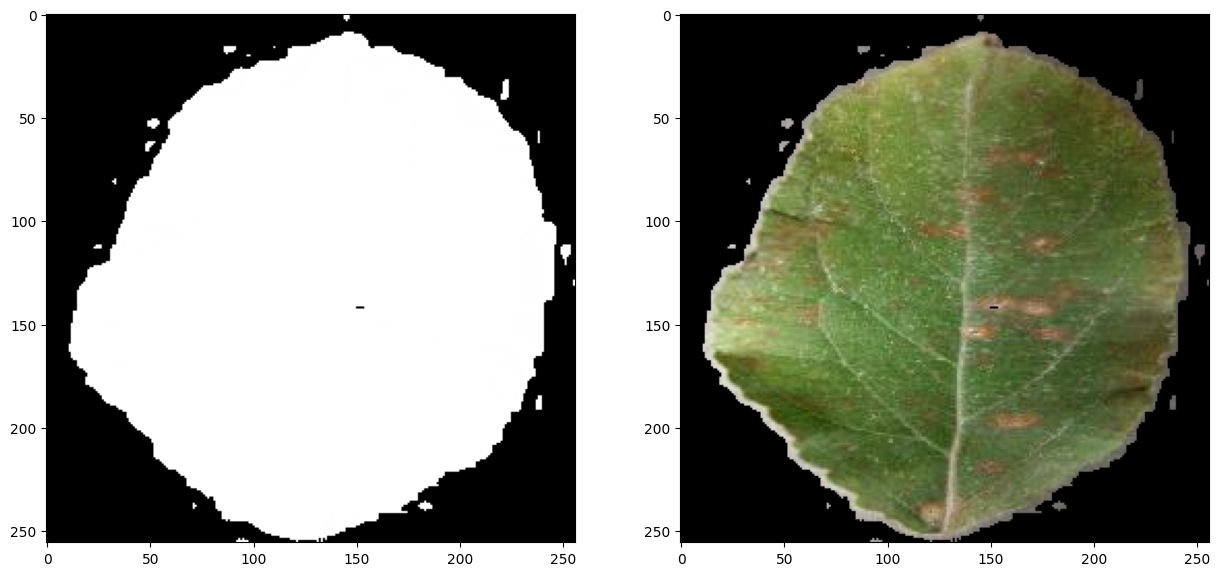

In [7]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [8]:
# Feature Descripotor
orb = cv2.ORB_create(nfeatures=400)
kp, des = orb.detectAndCompute(final_result, None)

# Find keypoints and descriptors directly
len(kp)

273

In [9]:
print(kp)

(< cv2.KeyPoint 0x149bd12d0>, < cv2.KeyPoint 0x149bd1960>, < cv2.KeyPoint 0x149b27150>, < cv2.KeyPoint 0x149b1f5d0>, < cv2.KeyPoint 0x14983d570>, < cv2.KeyPoint 0x149b40ba0>, < cv2.KeyPoint 0x149b40870>, < cv2.KeyPoint 0x149b40810>, < cv2.KeyPoint 0x149b408a0>, < cv2.KeyPoint 0x149b401e0>, < cv2.KeyPoint 0x149b405a0>, < cv2.KeyPoint 0x149c438d0>, < cv2.KeyPoint 0x149c439c0>, < cv2.KeyPoint 0x149c43b10>, < cv2.KeyPoint 0x149c437b0>, < cv2.KeyPoint 0x149c439f0>, < cv2.KeyPoint 0x149c43ae0>, < cv2.KeyPoint 0x149c43a80>, < cv2.KeyPoint 0x149c437e0>, < cv2.KeyPoint 0x149bee3f0>, < cv2.KeyPoint 0x149ba7450>, < cv2.KeyPoint 0x149ba7510>, < cv2.KeyPoint 0x149a43630>, < cv2.KeyPoint 0x149a43f00>, < cv2.KeyPoint 0x149a43900>, < cv2.KeyPoint 0x149bb6ba0>, < cv2.KeyPoint 0x149bb6b10>, < cv2.KeyPoint 0x149bb6810>, < cv2.KeyPoint 0x149bb6900>, < cv2.KeyPoint 0x149bb6930>, < cv2.KeyPoint 0x149bb67e0>, < cv2.KeyPoint 0x149bb6840>, < cv2.KeyPoint 0x149bb6750>, < cv2.KeyPoint 0x149bb67b0>, < cv2.KeyPoin

In [10]:
print(des)

[[ 76  99 197 ... 247 116 240]
 [ 50   1  38 ...  14  61 134]
 [194  65 134 ...  38  37   6]
 ...
 [214 255 155 ... 115 135 101]
 [205  36 152 ...  80 139  40]
 [249 199  44 ... 166  90  76]]


In [11]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

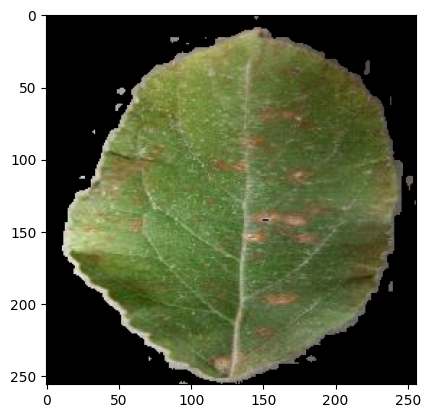

In [12]:
plt.imshow(final_result)


In [13]:
# global Feature
global_feature = des

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [15]:
global_feature.shape

(273, 32)

In [16]:
orb.descriptorSize()

32

In [17]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (273, 32)


In [18]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")